# Decision Tree & Random Forest



We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

1. Read your Titanic dataset as usual: Training set and Testing set Apply decision tree. 
2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.
3. Change the decision tree parameters(change at least two parameters), 
4. Calculate the new accuracy and compare it with the previous results. 
5. Use random forest then change the number of estimators
6. Calculate the new accuracy and compare it with the previous result.

In [2]:
import pandas as pd 
titanic=pd.read_csv("titanic-passengers.csv", sep=";")


#Preprocessing our data

titanic['Age'] = titanic['Age'].fillna((titanic['Age'].mean()))
titanic["Cabin"].fillna('G6', inplace=True)
titanic["Embarked"] = titanic["Embarked"].fillna('C')

titanic = titanic.drop(columns = 'Name')
titanic = titanic.drop(columns = 'PassengerId')

titanic['Survived'].replace(['No','Yes'], [0,1], inplace=True)
titanic['Sex'].replace(['male','female'], [0,1], inplace=True)
titanic['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic['Cabin']=encoder.fit_transform(titanic['Cabin'])
titanic['Ticket']=encoder.fit_transform(titanic['Ticket'])


titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,0,28.0,0,0,159,13.0000,145,0
1,0,3,0,25.0,0,0,347,7.6500,140,0
2,0,3,0,20.0,0,0,409,7.8542,145,0
3,0,3,1,29.0,0,4,395,21.0750,145,0
4,0,1,0,31.0,1,0,569,52.0000,38,0


In [5]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

#features extraction
x= titanic.drop(["Survived", "Cabin", "Ticket", "Embarked"], axis=1)
y= titanic["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.7877094972067039


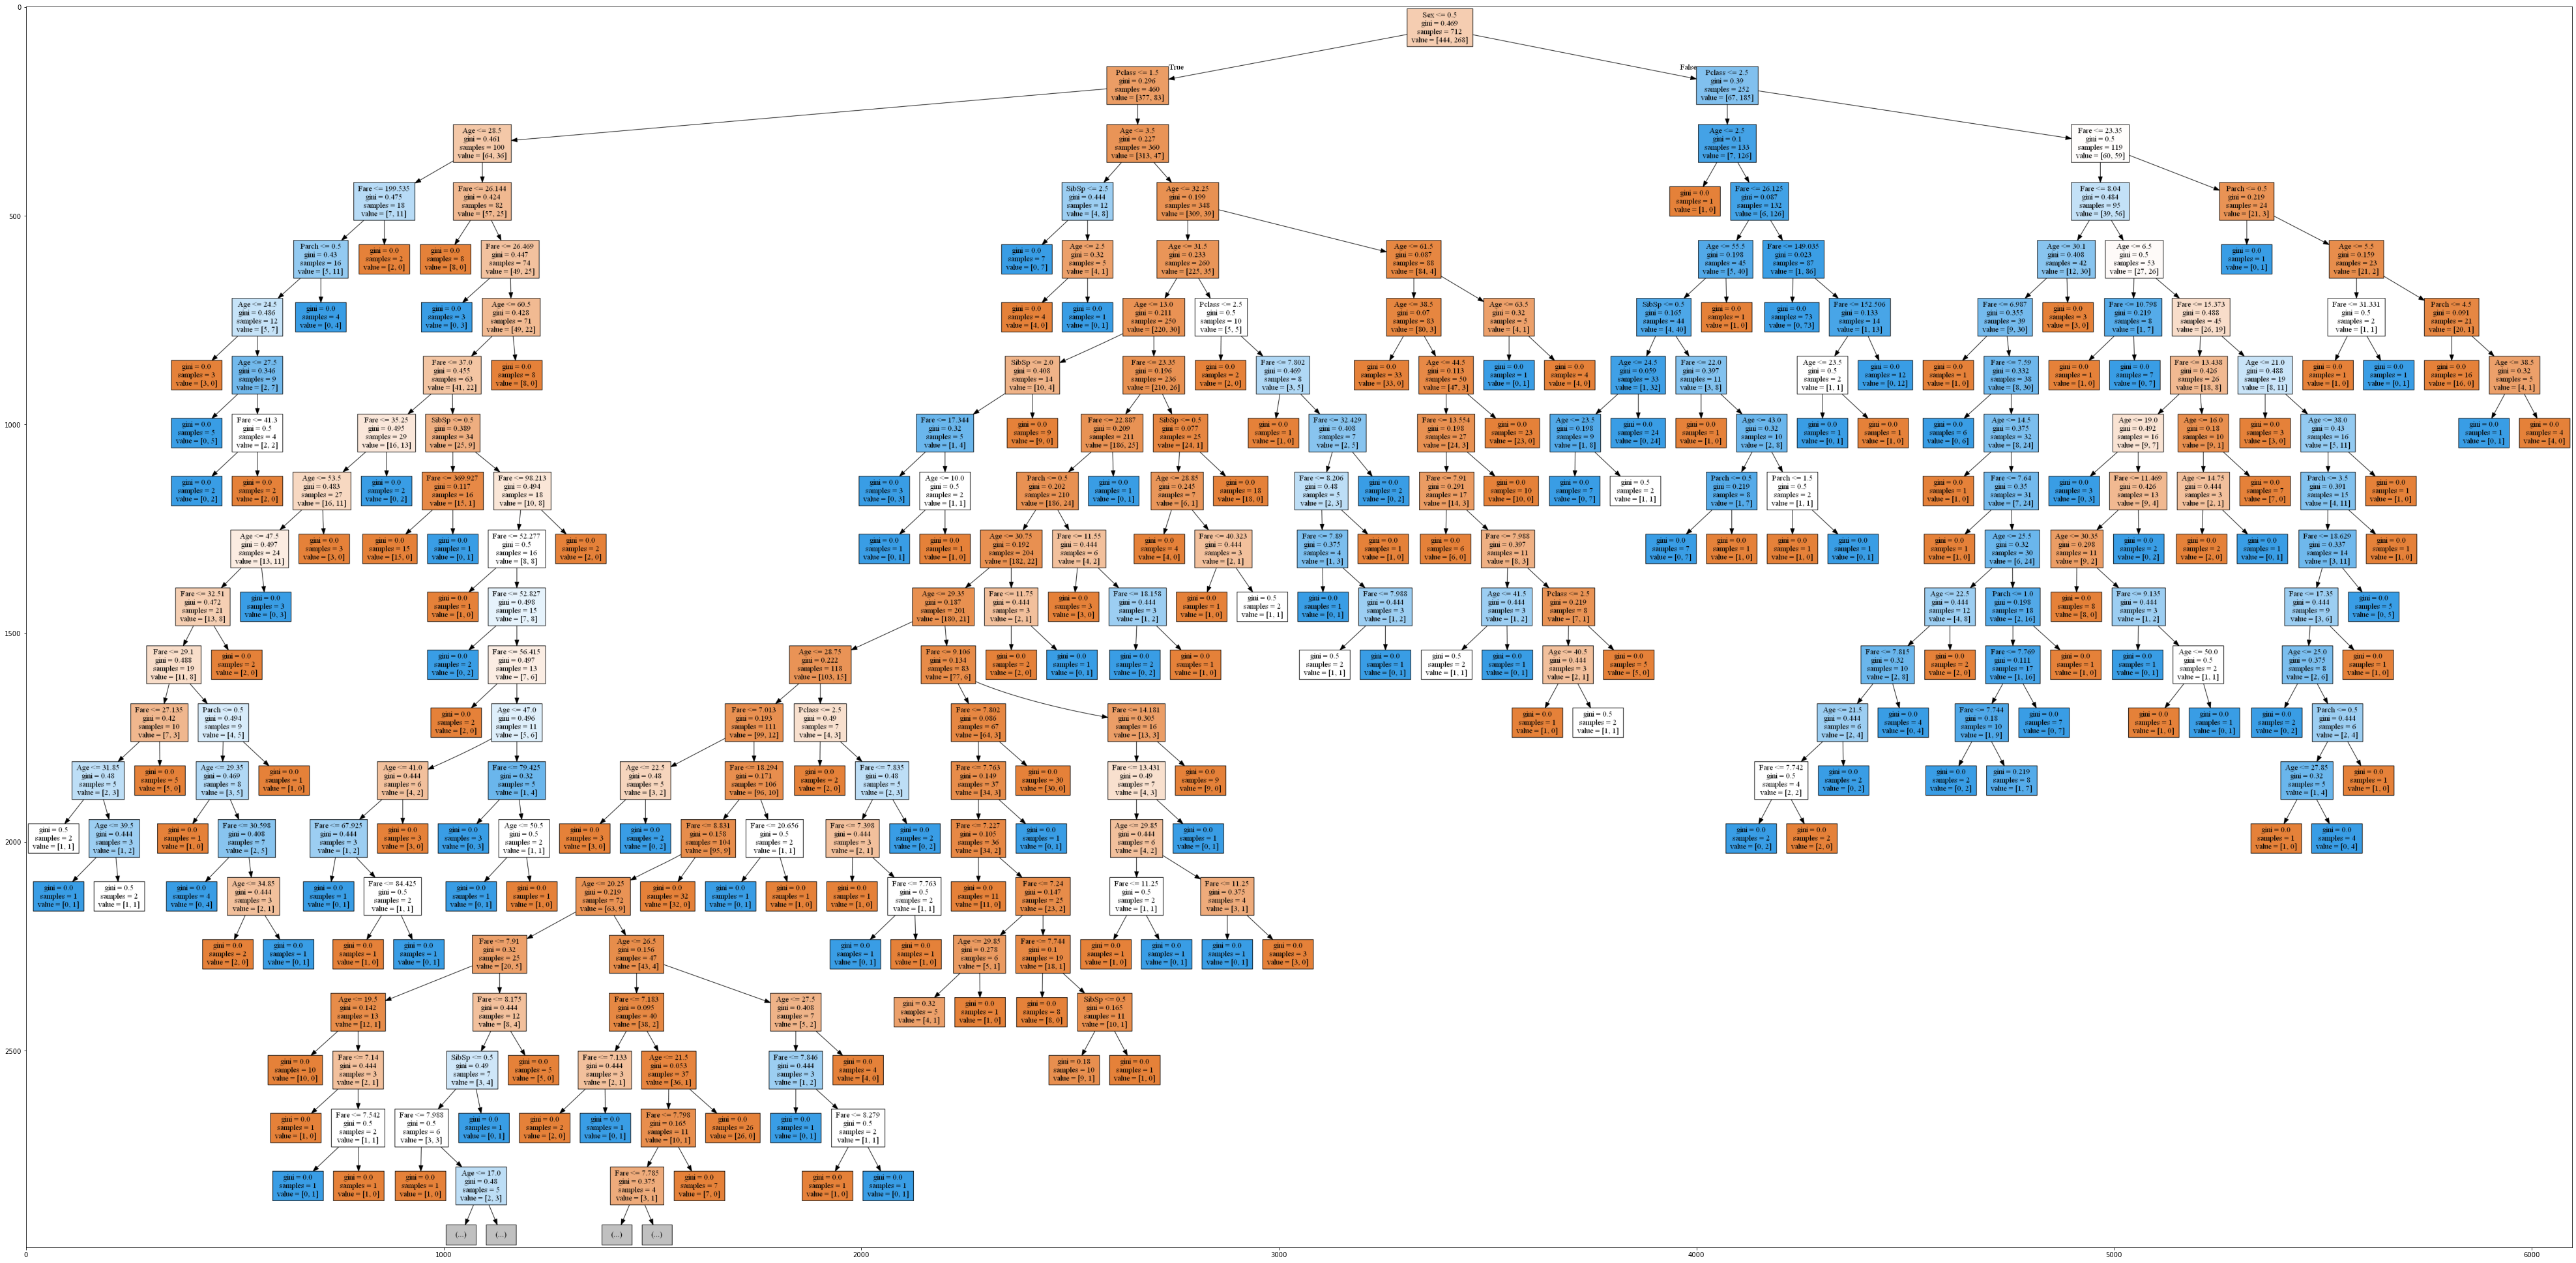

In [6]:
dot_titanic = tree.export_graphviz(classifier,out_file = 'tree.dot', feature_names=x_train.columns, max_depth=20, filled=True)

image = plt.imread('tree.png')
plt.figure(figsize=(70,70))
plt.imshow(image)

# I'll change 2 parameters in the decision tree 


To know what are the important parameters for our model, I will make 2 changes:

First option: we will drop the sex ; 

2nd option : we will drop the age.

So that we can khow which between the sex or age of passengers is the most important in our model.

In [7]:
# drop 2 parameters (the sex)
x1= titanic.drop(["Survived", "Sex", "Cabin", "Embarked"], axis=1)
y1= titanic["Survived"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20,random_state=10)

classifier1 = DecisionTreeClassifier()
classifier1.fit(x1_train, y1_train)   
y1_pred = classifier1.predict(x1_test)   

# drop 2 parameters (the age)
x2= titanic.drop(["Survived", "Age", "Cabin", "Embarked"], axis=1)
y2= titanic["Survived"]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.20,random_state=10)

classifier2 = DecisionTreeClassifier()
classifier2.fit(x2_train, y2_train)   
y2_pred = classifier2.predict(x2_test)     


print("score without Sex is:{}".format(accuracy_score(y1_test, y1_pred)))
print("-----------------------------------------------------------------------------------")
print("score without age is:{}".format(accuracy_score(y2_test, y2_pred)))

score without Sex is:0.6703910614525139
-----------------------------------------------------------------------------------
score without age is:0.8044692737430168


In the 1st option (the sex) we got 67% accuracy instead of 79%. which means that the sex influence on the accuarcy of our model

In the 2nd option (the age) we got 80% accuracy instead of 79%. which means that the age doesn't influence on the accuarcy of our model


Which means that the Sex of passengers is more important than the age of passengers for our model.

In [9]:
x= titanic.drop(["Survived", "Age", "Cabin", "Embarked"], axis=1)
y= titanic["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.8100558659217877


Here we choose the 2nd option and we applied the random forest algorithm.
We got  81% which means thant the random forest algorithm is better than the decision tree.